##***Implementation of linear regression using tensorflow with gradient tape.***##
Let the equation of straight line be y = (m * x) + c. Let y = (5 * x) + 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.13.0


***Training Data Generation***





In [ ]:
# Training Data
X_train = tf.constant(range(10), dtype = 'float32')
y_train = (5 * X) + 3
print(f"X_train: {X_train}")
print(f"y_train: {y_train}")

X_train: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
y_train: [ 3.  8. 13. 18. 23. 28. 33. 38. 43. 48.]


***Test Data Generation***

In [ ]:
X_test = tf.constant(range(10,20), dtype = 'float32')
y_test = (5 * X_test) + 3
print(f"X_test: {X_test}")
print(f"y_test: {y_test}")

X_test: [10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
y_test: [53. 58. 63. 68. 73. 78. 83. 88. 93. 98.]


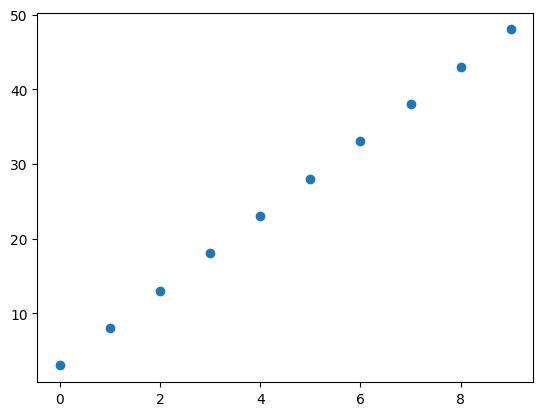

In [ ]:
plt.scatter(X_train, y_train)

***Baseline Model.. Predict mean as solution***

In [ ]:
def predict(X_train, y_train):
  y_mean = y_train.numpy().mean()
  y_pred = [y_mean] * len(X_train)
  return y_pred

def compute_mse(y_pred, y_train):
  errors = (y_train - y_pred) ** 2
  return tf.reduce_mean(errors)

In [ ]:
y_pred = predict(X_train, y_train)
loss = compute_mse(y_pred, y_test)
print(loss.numpy())

2706.25


***Linear Regression Model***

In [ ]:
def compute_mse_linear(X_train, y_train, m, c):
  y_pred = (m * X_train) + c
  errors = (y - y_pred) ** 2
  return tf.reduce_mean(errors)

def compute_gradient(X_train, y_train, m, c):
  with tf.GradientTape() as tape:
    loss = compute_mse_linear(X_train, y_train, m, c)
  return tape.gradient(loss, [m,c])

In [ ]:
m = tf.Variable(0.0)
c = tf.Variable(0.0)
d_m , d_c = compute_gradient(X_train, y_train, m, c)
print(f"d_m: {d_m}")
print(f"d_c: {d_c}")

d_m: -312.0
d_c: -51.0


In [ ]:
steps = 10
lr = 0.01

m = tf.Variable(0.0)
c = tf.Variable(0.0)

for step in range(0, steps + 1):
  d_m , d_c = compute_gradient(X_train, y_train, m, c)
  m.assign_sub(d_m * lr)
  c.assign_sub(d_c * lr)

  loss = compute_mse_linear(X_train, y_train, m, c)
  msg = f"Epoch {step} - loss: {loss}, m: {m}, c: {c} \n"
  print(msg)


Epoch 0 - loss: 149.06130981445312, m: <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.12>, c: <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.51> 

Epoch 1 - loss: 26.830036163330078, m: <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=4.4157>, c: <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.729> 

Epoch 2 - loss: 5.700891017913818, m: <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=4.953141>, c: <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.827007> 

Epoch 3 - loss: 2.038567066192627, m: <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.1754203>, c: <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.87468415> 

Epoch 4 - loss: 1.393986463546753, m: <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.2667093>, c: <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.90140265> 

Epoch 5 - loss: 1.2708947658538818, m: <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.303559>, c: <tf.Variable 'Va

In [ ]:
print(f"slope(m): {m}, intercept(c): {c}")

slope(m): <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.3215213>, intercept(c): <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.9816765>
